# Ellipsoidal nested sampling

This example demonstrates how to use ellipsoidal nested rejection sampling [1] to sample from the posterior distribution for a logistic model fitted to model-simulated data.

[1] "A nested sampling algorithm for cosmological model selection", Pia Mukherjee, David Parkinson and Andrew R. Liddle, [arXiv:astro-ph/0508461v2](https://arxiv.org/abs/astro-ph/0508461).

First create fake data.

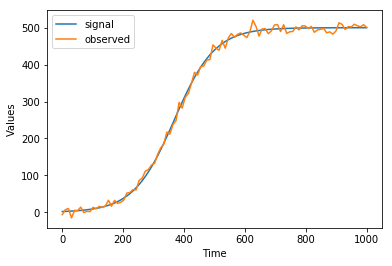

In [1]:
import pints
import pints.toy as toy
import numpy as np
import matplotlib.pyplot as plt

# Load a forward model
model = toy.LogisticModel()

# Create some toy data
r = 0.015
k = 500
real_parameters = [r, k]
times = np.linspace(0, 1000, 100)
signal_values = model.simulate(real_parameters, times)

# Add independent Gaussian noise
sigma = 10
observed_values = signal_values + pints.noise.independent(sigma, signal_values.shape)

# Plot
plt.plot(times,signal_values,label = 'signal')
plt.plot(times,observed_values,label = 'observed')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()

Create the nested sampler that will be used to sample from the posterior.

In [2]:
# Create an object with links to the model and time series
problem = pints.SingleOutputProblem(model, times, observed_values)

# Create a log-likelihood function (adds an extra parameter!)
log_likelihood = pints.GaussianLogLikelihood(problem)

# Create a uniform prior over both the parameters and the new noise variable
log_prior = pints.UniformLogPrior(
    [0.01, 400, sigma * 0.5],
    [0.02, 600, sigma * 1.5])

# Create a nested ellipsoidal rejectection sampler
sampler = pints.NestedController(log_likelihood, log_prior, method=pints.NestedEllipsoidSampler)

# Set number of iterations
sampler.set_iterations(8000)

# Set the number of posterior samples to generate
sampler.set_n_posterior_samples(1600)

# Do proposals in parallel
sampler.set_parallel(True)

# Use dynamic enlargement factor
sampler._sampler.set_dynamic_enlargement_factor(1)

Run the sampler!

In [3]:
samples = sampler.run()
print('Done!')

Running Nested ellipsoidal sampler
Number of active points: 400
Total number of iterations: 8000
Total number of posterior samples: 1600
Iter. Eval. Time m:s Delta_log(z) Acceptance rate
0     1       0:05.6 -inf          1             
0     2       0:05.6 -inf          1             
0     21      0:05.6 -inf          1             
0     41      0:05.7 -inf          1             
0     61      0:05.7 -inf          1             
0     81      0:05.8 -inf          1             
0     101     0:05.8 -inf          1             
0     121     0:05.8 -inf          1             
0     141     0:05.9 -inf          1             
0     161     0:05.9 -inf          1             
0     181     0:06.0 -inf          1             
0     201     0:06.0 -inf          1             
0     221     0:06.1 -inf          1             
0     241     0:06.1 -inf          1             
0     261     0:06.2 -inf          1             
0     281     0:06.2 -inf          1             
0     301    

2840  6448    0:30.4 -27.47903096  0.46957672    
2860  6496    0:30.5 -26.70709881  0.469160105   
2880  6532    0:31.0 -25.93762189  0.469667319   
2900  6576    0:31.0 -25.27702144  0.469559585   
2920  6596    0:31.1 -24.61540232  0.471271788   
2940  6620    0:31.1 -24.0467441   0.47266881    
2960  6644    0:31.2 -23.48313358  0.474055093   
2980  6668    0:31.2 -22.93188037  0.475430759   
3000  6692    0:31.3 -22.39463485  0.476795931   
3020  6720    0:31.3 -21.89199034  0.477848101   
3040  6748    0:31.3 -21.38515542  0.478890989288
3060  6780    0:31.4 -20.8674129   0.479623824   
3080  6808    0:31.4 -20.37271826  0.480649189   
3100  6836    0:31.5 -19.84836779  0.481665631   
3120  6876    0:31.6 -19.29009278  0.481778876   
3140  6904    0:31.6 -18.73268854  0.482779828   
3160  6948    0:31.7 -18.1433521   0.482590104   
3180  6988    0:31.7 -17.54468311  0.482695811   
3200  7036    0:32.6 -16.94597411  0.482218204   
3220  7060    0:32.6 -16.43274182  0.483483483   


## Plot posterior samples versus true parameter values (dashed lines)

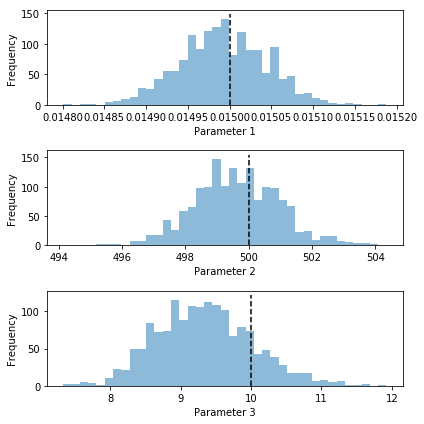

In [4]:
# Plot output
import pints.plot

pints.plot.histogram([samples], ref_parameters=[r, k, sigma])

plt.show()

## Plot posterior predictive simulations versus the observed data

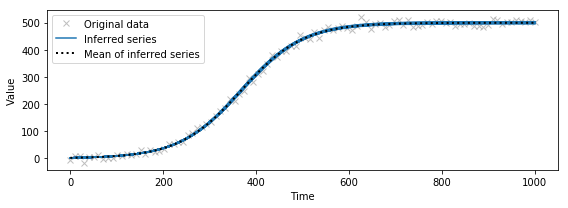

In [5]:
pints.plot.series(samples[:100], problem)
plt.show()

## Marginal likelihood estimate

In [6]:
print('marginal log-likelihood = ' + str(sampler.marginal_log_likelihood())
      + ' ± ' + str(sampler.marginal_log_likelihood_standard_deviation()))

marginal log-likelihood = -375.348895962891 ± 0.07908966826933428


## Effective sample size

In [7]:
print('effective sample size = ' + str(sampler.effective_sample_size()))

effective sample size = 1597.4248390822784
